Task 3 : For given Iris data set create decision tree classifier and visualize it graphicaly.

Name : Jainam Shah

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


Importing dataset

In [7]:
iris = pd.read_csv('Iris (1).csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
new_data = list(iris.columns[2:])

Data Visualization

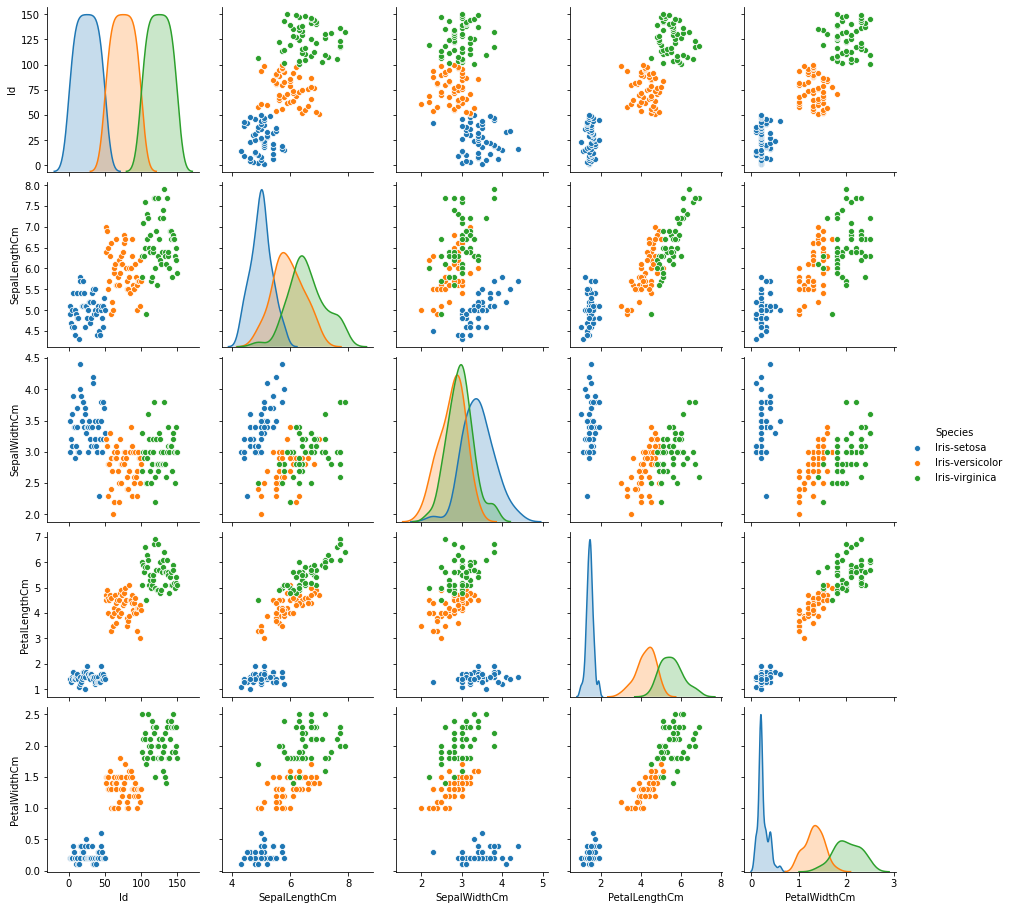

In [15]:
sns.pairplot( iris , hue = 'Species')
plt.show()



Data Pre-Processing

In [17]:
#  import Label Encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in Column Species
iris['Species'] = label_encoder.fit_transform(iris['Species'])
iris['Species'].unique()

array([0, 1, 2])

In [18]:
X = iris.drop(['Species', 'Id'],axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = pd.Series(iris.Species)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

Importing Train Test Split


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2,random_state = 0)

Decision Tree Classifier


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

Making Predictions And Evaluations


In [23]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Graphical Representation

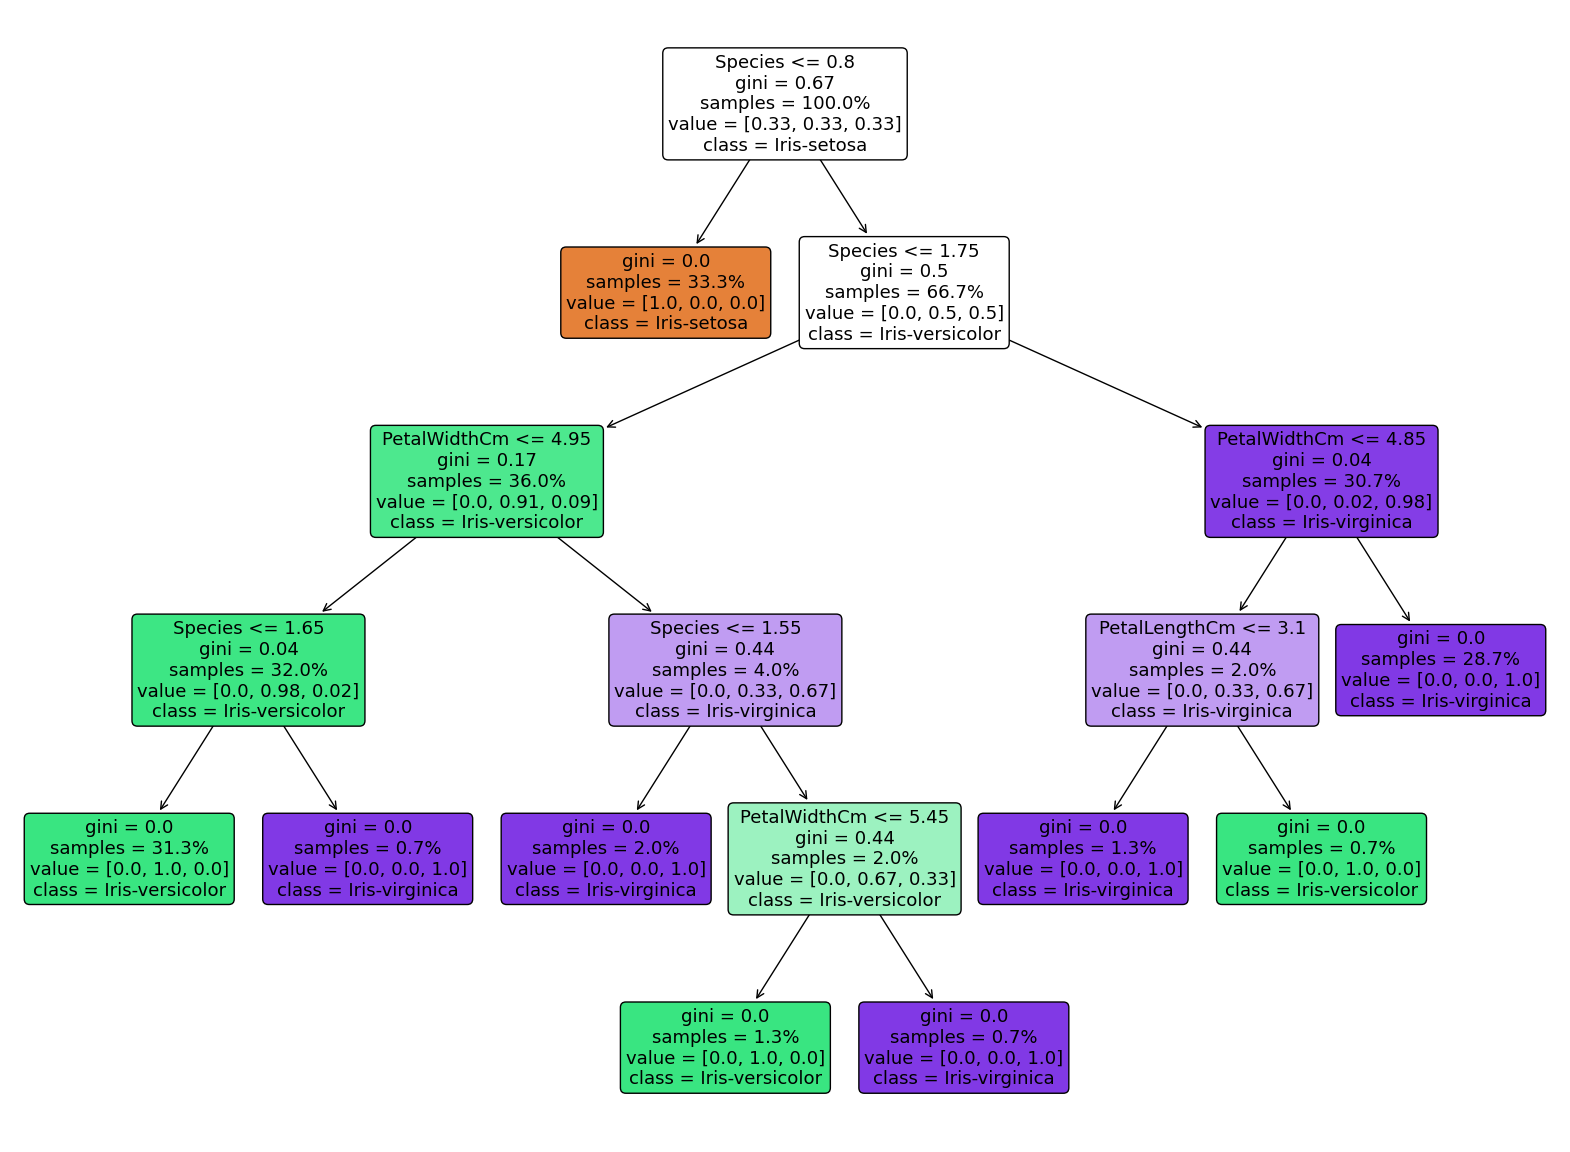

In [24]:
from sklearn import tree
plt.figure(figsize =(20,15), facecolor = 'white', dpi = 100)
dt.fit(X,y)
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
tree_plt = tree.plot_tree(dt, feature_names = new_data , fontsize = 13,class_names = target , precision = 2, proportion = True, filled = True , rounded = 10)
plt.show()

Optimising The Tree

In [25]:

dtc= DecisionTreeClassifier(criterion = "entropy",max_depth = 3, random_state = 0,presort = False, splitter='best')
dtc = dtc.fit(X_train,y_train)
dtc

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


DecisionTreeClassifier(criterion='entropy', max_depth=3, presort=False,
                       random_state=0)

In [26]:
y_pred = dtc.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## Time to visualize the optimised tree

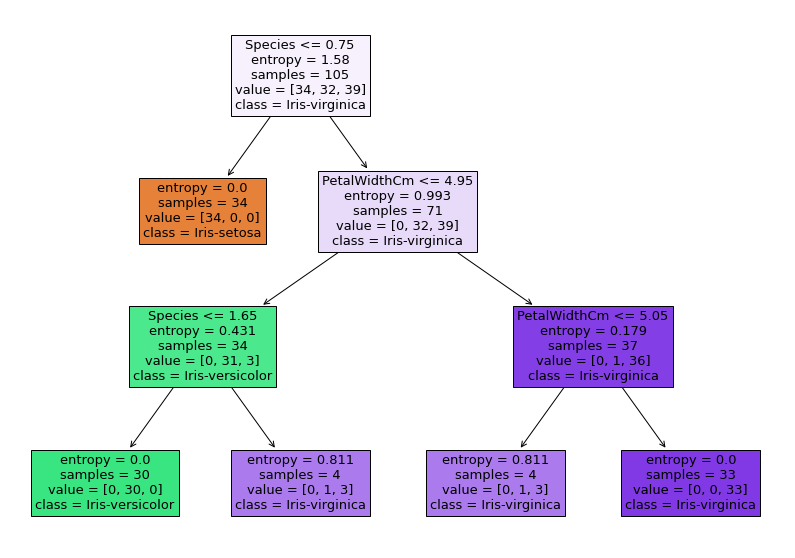

In [27]:

fig = plt.figure(figsize = (14,10))
plot_tree1= tree.plot_tree(dtc, feature_names = new_data ,fontsize = 13,filled = True, class_names = target)